# 3. Descriptive Statistics of the Dataset

This notebook, part of the ETL phase of the project, is devoted to describing the dataset that will posteriorly be used during the analysis phase.

In [1]:
# Necessary imports
import emoji
import numpy as np
import polars as pl
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from scipy.stats import gaussian_kde

# Get the absolute path of the project's root directory
ROOT_DIR = Path.resolve(Path.cwd() / "../")

# Add root directory to sys.path
sys.path.append(str(ROOT_DIR))

from src.utils.set_seed import set_seed

# Set the seed for reproducibility
rng = set_seed()

# Configure matplotlib for LaTeX rendering
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["text.latex.preamble"] = r"\usepackage{mathpazo}"


In [2]:
# Directory management
DATA_DIR = ROOT_DIR / "data"
PREPROCESSED_DATA_DIR = DATA_DIR / "preprocessed"
SPLITTED_DATA_DIR = DATA_DIR / "splitted"

FIGURES_DIR = ROOT_DIR / "etc/figures"


In [3]:
# Load the datasets
dataset = pl.read_parquet(PREPROCESSED_DATA_DIR / "dataset_preprocessed_2_classes.parquet")

train_dataset = pl.read_parquet(SPLITTED_DATA_DIR / "train_2_classes.parquet")
val_dataset = pl.read_parquet(SPLITTED_DATA_DIR / "val_2_classes.parquet")
test_dataset = pl.read_parquet(SPLITTED_DATA_DIR / "test_2_classes.parquet")


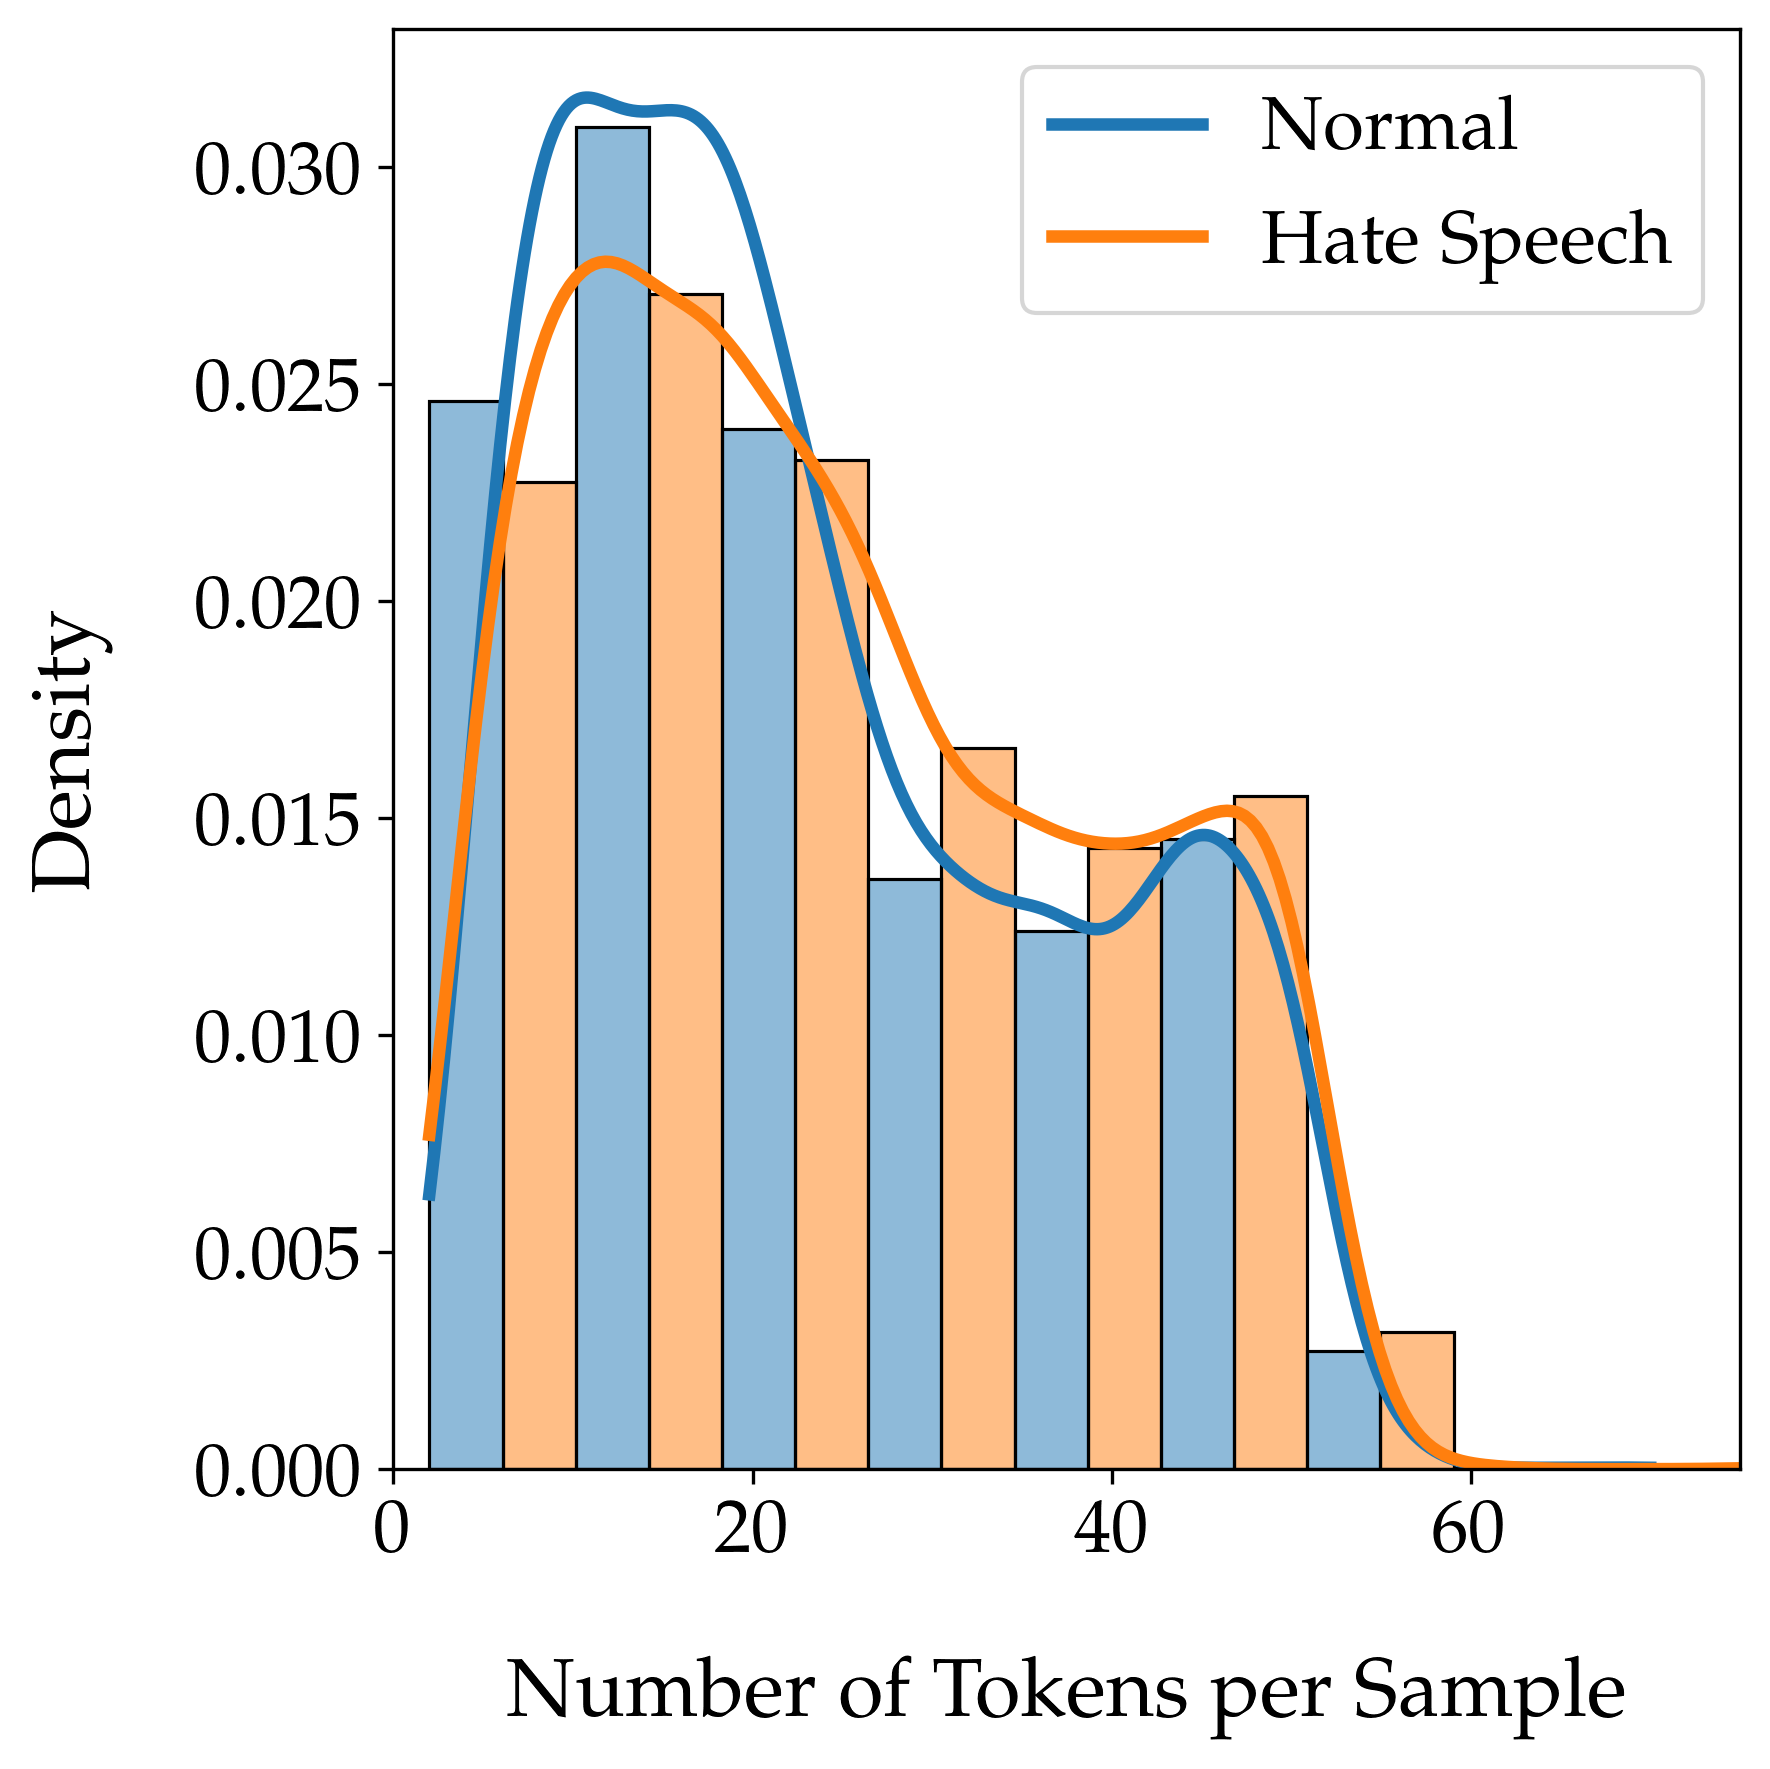

In [4]:
# Number of tokens per sample
df_descript = dataset.to_pandas().copy()
df_descript["n_tokens"] = df_descript["tokens"].apply(len)


fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

df_descript["label"] = df_descript["label"].map({
    "normal": "Normal",
    "hatespeech": "Hate Speech",
})

sns.histplot(
    data=df_descript,
    x="n_tokens",
    hue="label",
    bins=20,
    kde=False,
    stat="density",
    ax=ax,
    multiple="dodge",
    common_norm=False,
    alpha=0.5,
)

bin_edges = np.histogram_bin_edges(df_descript["n_tokens"], bins=20)

for label, color in zip(["Normal", "Hate Speech"], sns.color_palette()):
    subset = df_descript[df_descript["label"] == label]

    kde = gaussian_kde(subset["n_tokens"], bw_method="scott")

    x_vals = np.linspace(subset["n_tokens"].min(), subset["n_tokens"].max(), 500)
    y_kde = kde(x_vals)

    ax.plot(x_vals, y_kde, lw=3, label=f"{label}", color=color)

ax.legend(fontsize=18)

ax.set_xlim(0, 75)
ax.tick_params(axis="both", which="major", labelsize=18)

ax.set_xlabel("Number of Tokens per Sample", fontdict={"size": 20}, labelpad=20)
ax.set_ylabel("Density", fontdict={"size": 20}, labelpad=20)

plt.tight_layout()
plt.savefig(FIGURES_DIR / "descriptive" / "desc_n_tokens_wh.png", dpi=300, bbox_inches="tight")


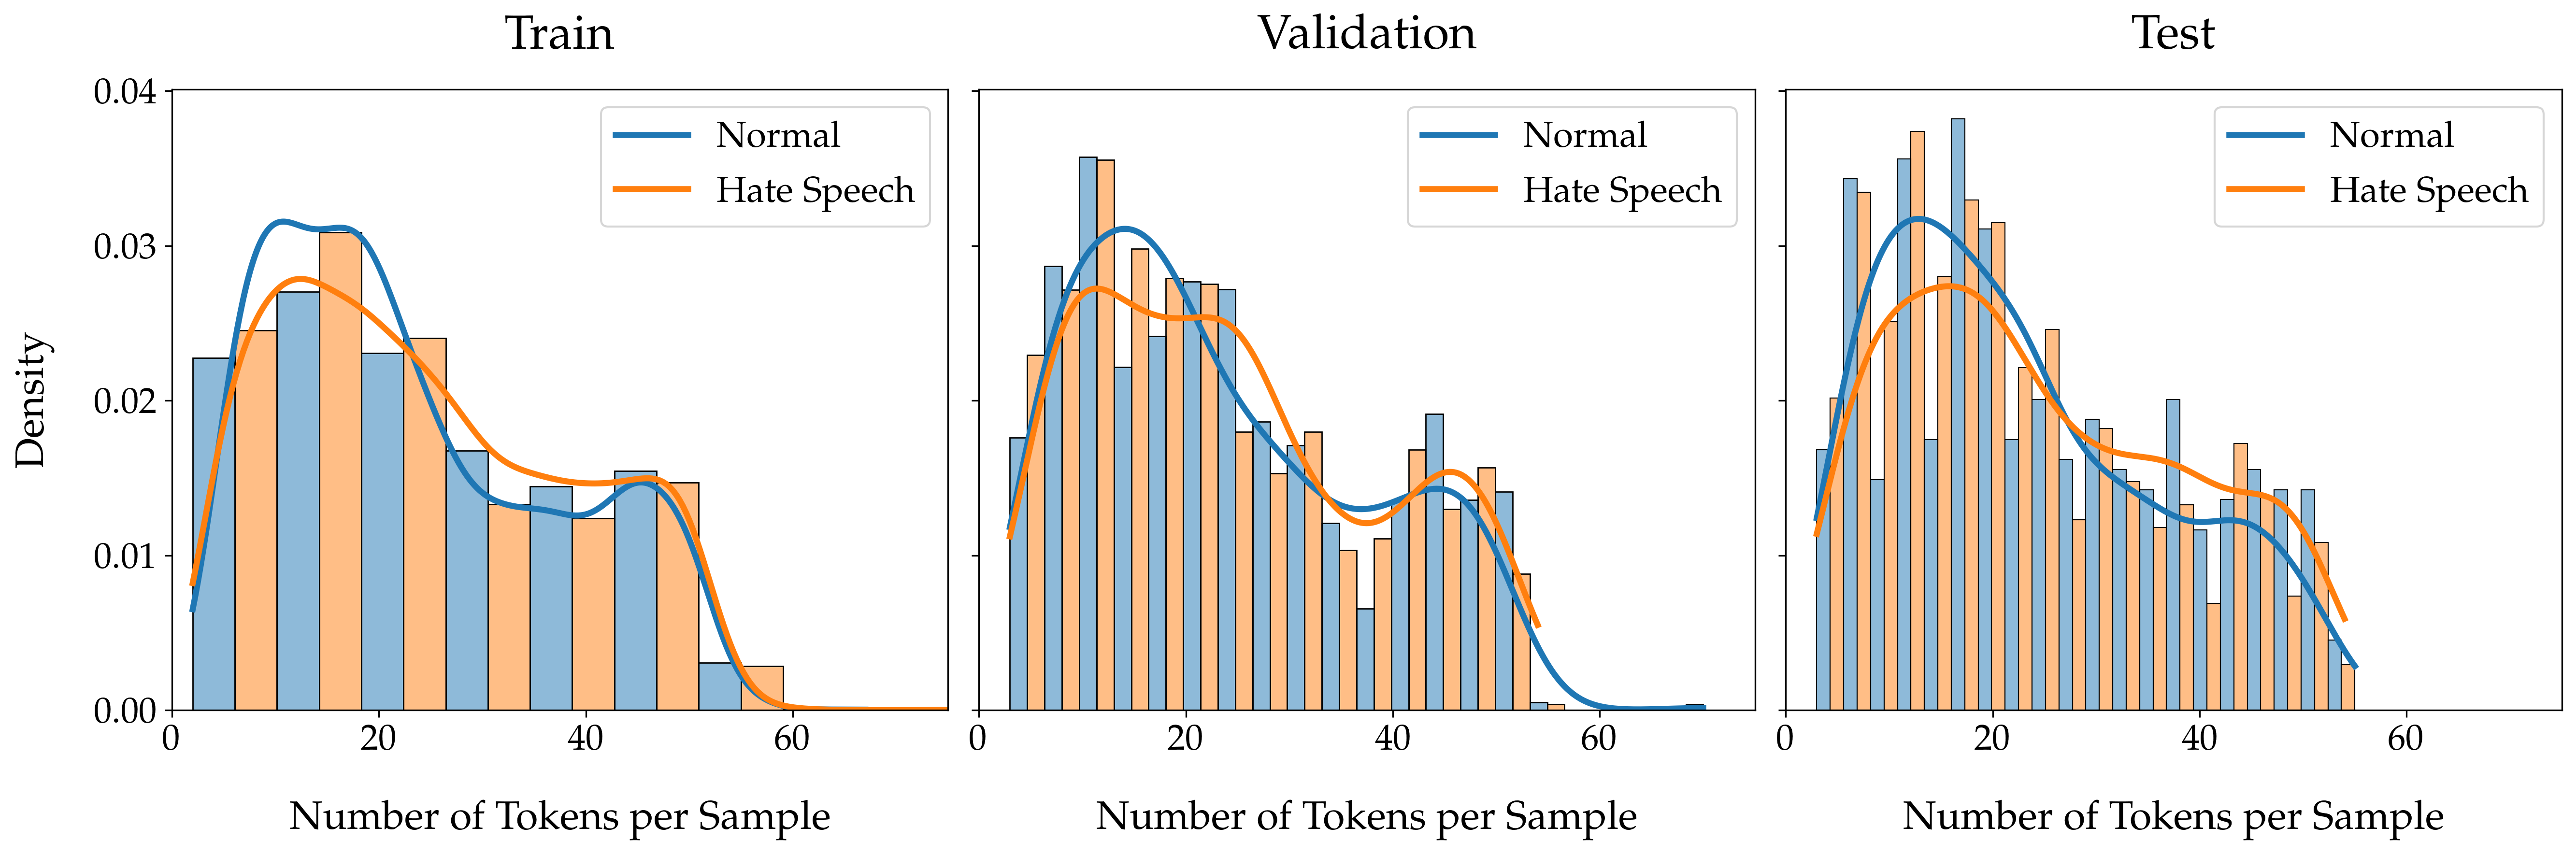

In [5]:
# Number of tokens per sample
train_descript = train_dataset.to_pandas().copy()
train_descript["n_tokens"] = train_descript["tokens"].apply(len)
train_descript["label"] = train_descript["label"].map({
    "normal": "Normal",
    "hatespeech": "Hate Speech",
})


val_descript = val_dataset.to_pandas().copy()
val_descript["n_tokens"] = val_descript["tokens"].apply(len)
val_descript["label"] = val_descript["label"].map({
    "normal": "Normal",
    "hatespeech": "Hate Speech",
})

test_descript = test_dataset.to_pandas().copy()
test_descript["n_tokens"] = test_descript["tokens"].apply(len)
test_descript["label"] = test_descript["label"].map({
    "normal": "Normal",
    "hatespeech": "Hate Speech",
})


fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, dpi=300)

for i, (df_descript, ax) in enumerate(zip([train_descript, val_descript, test_descript], axs)):
    sns.histplot(
        data=df_descript,
        x="n_tokens",
        hue="label",
        bins=20,
        kde=False,
        stat="density",
        ax=ax,
        multiple="dodge",
        common_norm=False,
        alpha=0.5,
    )

    bin_edges = np.histogram_bin_edges(df_descript["n_tokens"], bins=20)

    for label, color in zip(["Normal", "Hate Speech"], sns.color_palette()):
        subset = df_descript[df_descript["label"] == label]

        kde = gaussian_kde(subset["n_tokens"], bw_method="scott")

        x_vals = np.linspace(subset["n_tokens"].min(), subset["n_tokens"].max(), 500)
        y_kde = kde(x_vals)

        ax.plot(x_vals, y_kde, lw=3, label=f"{label}", color=color)

    ax.legend(fontsize=18)

    ax.set_xlim(0, 75)
    ax.tick_params(axis="both", which="major", labelsize=18)

    ax.set_xlabel("Number of Tokens per Sample", fontdict={"size": 20}, labelpad=20)
    ax.set_ylabel("Density", fontdict={"size": 20}, labelpad=20)

    ax.set_title(["Train", "Validation", "Test"][i], fontdict={"size": 24}, pad=20)

plt.tight_layout()
plt.savefig(FIGURES_DIR / "descriptive" / "desc_n_tokens_sp.png", dpi=300, bbox_inches="tight")


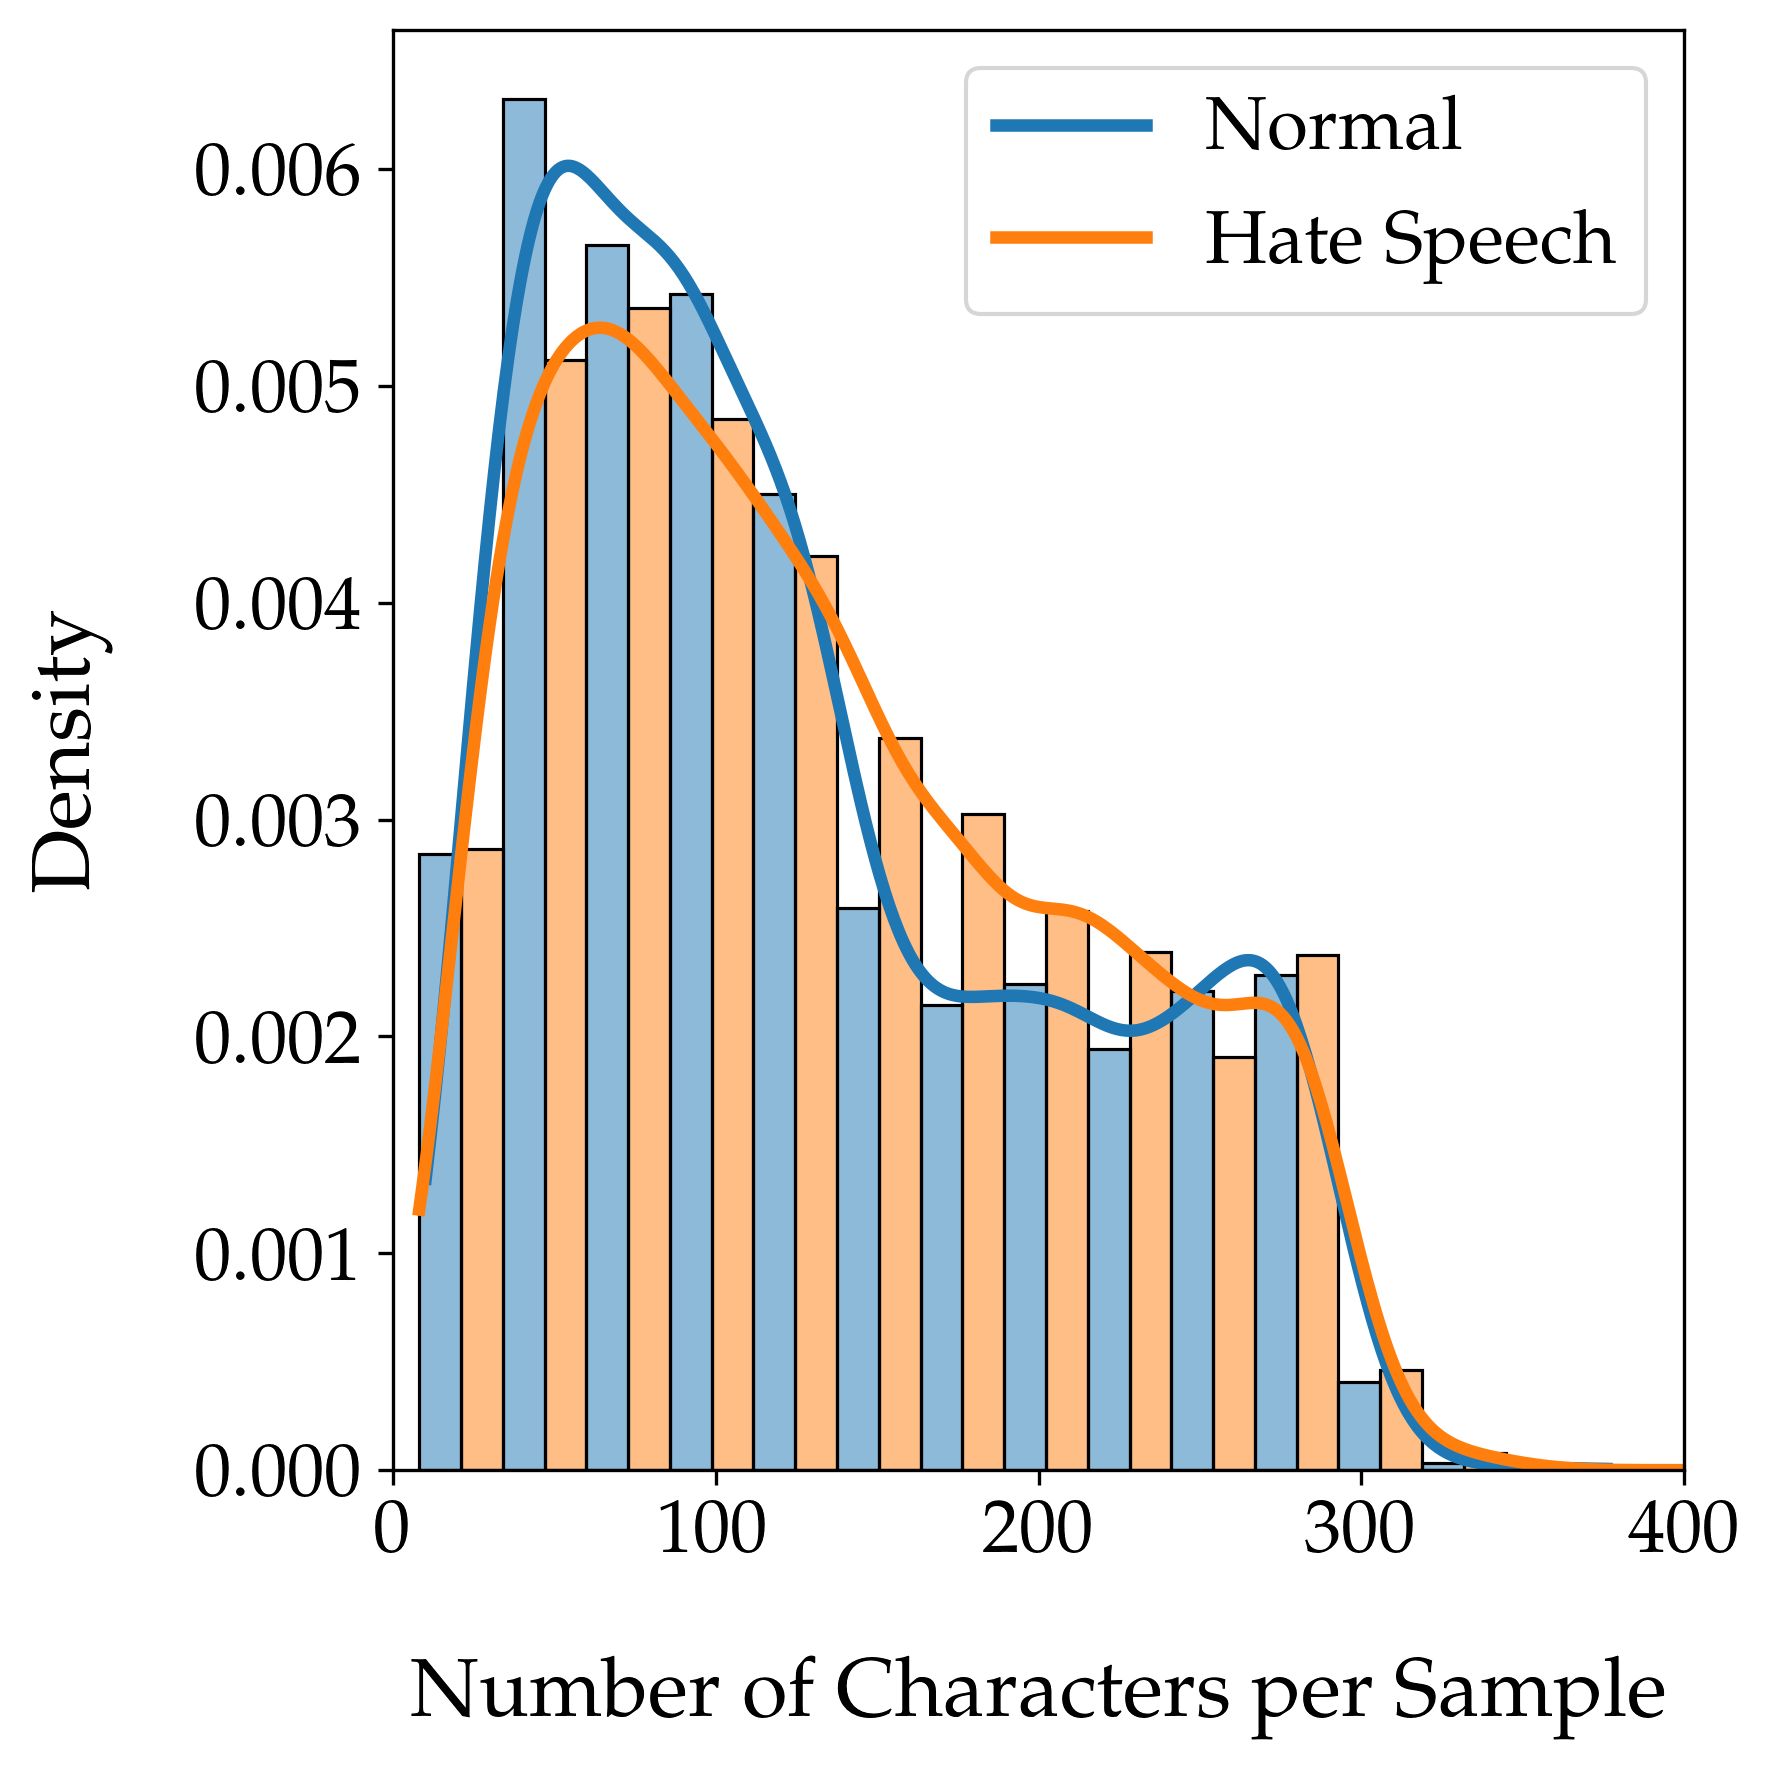

In [6]:
# Number of characters per sample
df_descript = dataset.to_pandas().copy()
df_descript["n_chars"] = df_descript["tokens"].apply(lambda x: len(" ".join(x)))

fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

df_descript["label"] = df_descript["label"].map({
    "normal": "Normal",
    "hatespeech": "Hate Speech",
})

sns.histplot(
    data=df_descript,
    x="n_chars",
    hue="label",
    bins=20,
    kde=False,
    stat="density",
    ax=ax,
    multiple="dodge",
    common_norm=False,
    alpha=0.5,
)


bin_edges = np.histogram_bin_edges(df_descript["n_chars"], bins=20)

for label, color in zip(["Normal", "Hate Speech"], sns.color_palette()):
    subset = df_descript[df_descript["label"] == label]

    kde = gaussian_kde(subset["n_chars"], bw_method="scott")

    x_vals = np.linspace(subset["n_chars"].min(), subset["n_chars"].max(), 500)
    y_kde = kde(x_vals)

    ax.plot(x_vals, y_kde, lw=3, label=f"{label}", color=color)

ax.legend(fontsize=18)

ax.set_xlim(0, 400)

ax.tick_params(axis="both", which="major", labelsize=18)


ax.set_xlabel("Number of Characters per Sample", fontdict={"size": 20}, labelpad=20)
ax.set_ylabel("Density", fontdict={"size": 20}, labelpad=20)


plt.tight_layout()
plt.savefig(FIGURES_DIR / "descriptive" / "desc_n_chars_wh.png", dpi=300, bbox_inches="tight")


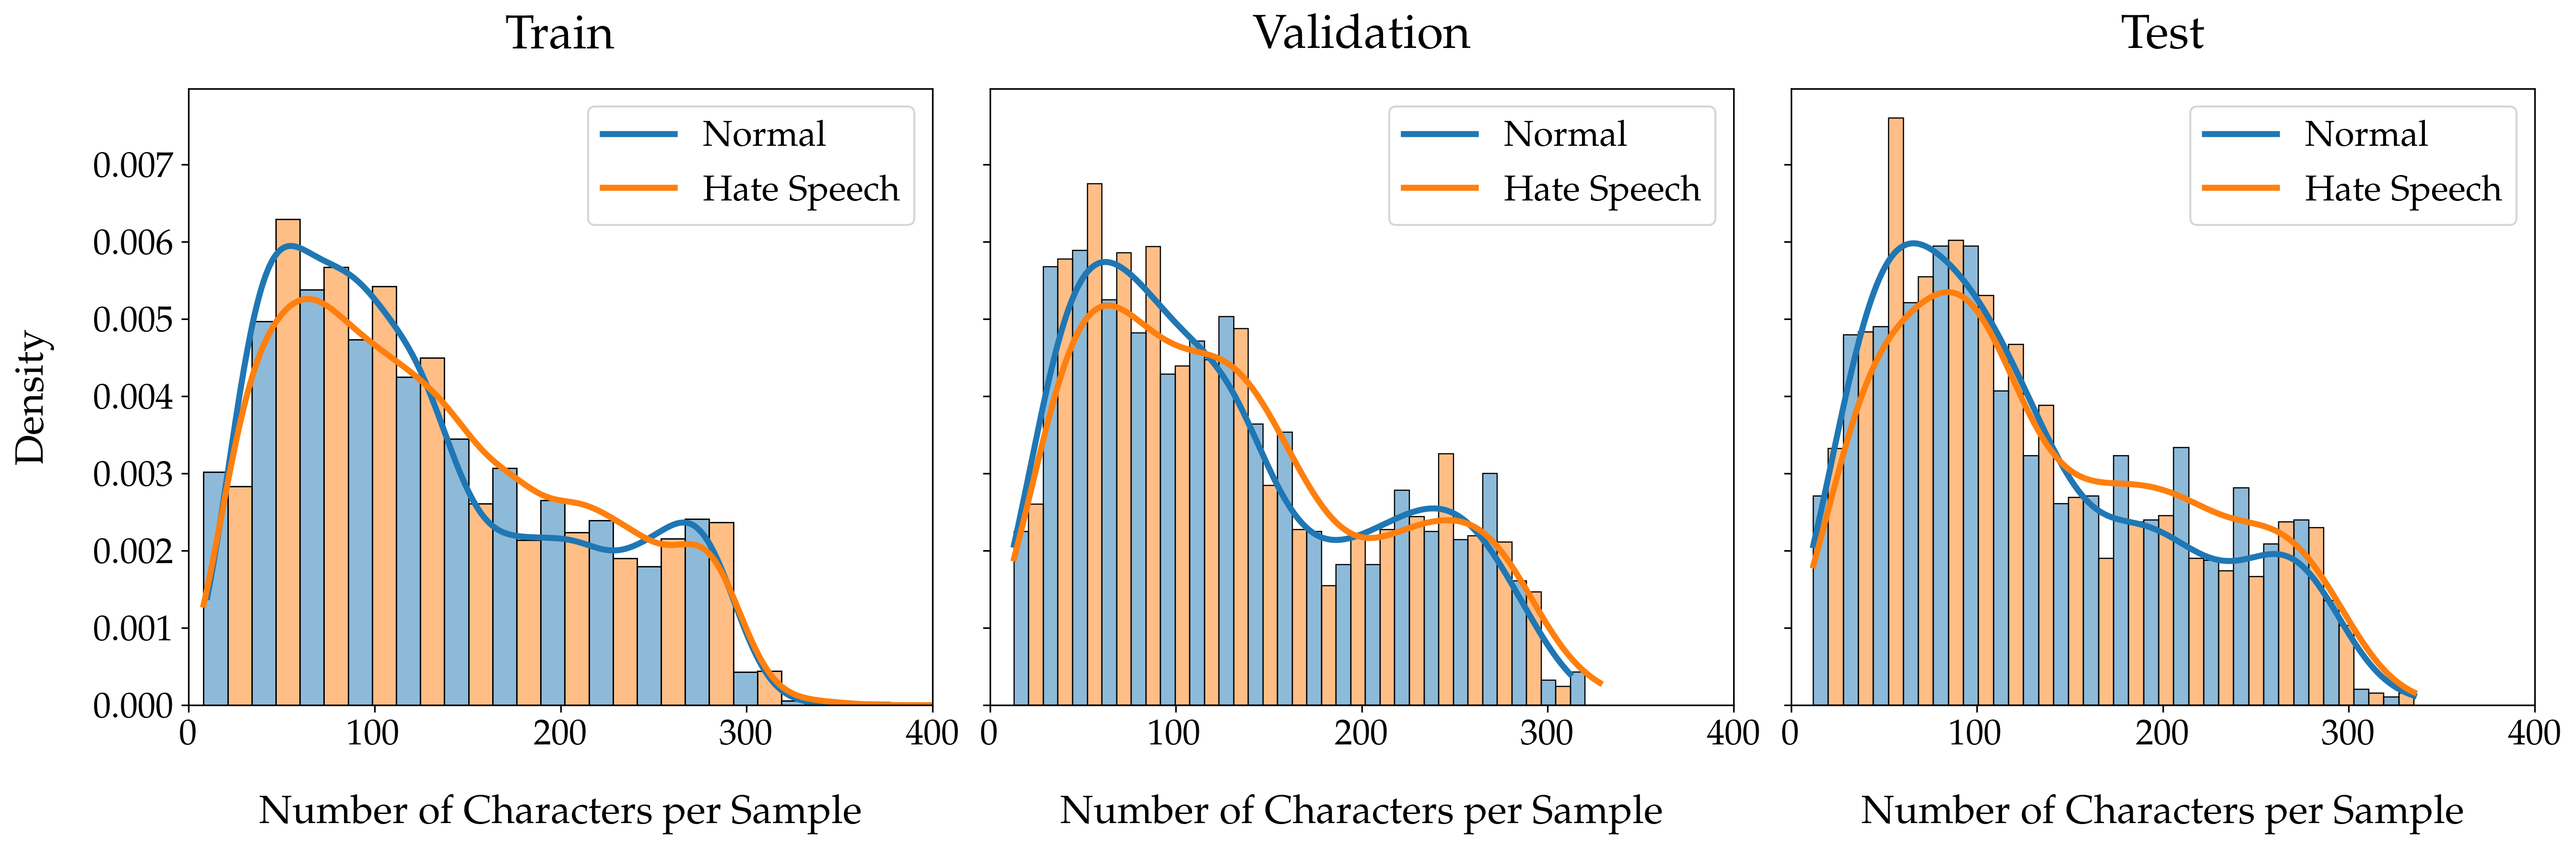

In [8]:
# Number of characters per sample
train_descript = train_dataset.to_pandas().copy()
train_descript["n_chars"] = train_descript["tokens"].apply(lambda x: len(" ".join(x)))
train_descript["label"] = train_descript["label"].map({
    "normal": "Normal",
    "hatespeech": "Hate Speech",
})


val_descript = val_dataset.to_pandas().copy()
val_descript["n_chars"] = val_descript["tokens"].apply(lambda x: len(" ".join(x)))
val_descript["label"] = val_descript["label"].map({
    "normal": "Normal",
    "hatespeech": "Hate Speech",
})

test_descript = test_dataset.to_pandas().copy()
test_descript["n_chars"] = test_descript["tokens"].apply(lambda x: len(" ".join(x)))
test_descript["label"] = test_descript["label"].map({
    "normal": "Normal",
    "hatespeech": "Hate Speech",
})


fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, dpi=300)


for i, (df_descript, ax) in enumerate(zip([train_descript, val_descript, test_descript], axs)):
    sns.histplot(
        data=df_descript,
        x="n_chars",
        hue="label",
        bins=20,
        kde=False,
        stat="density",
        ax=ax,
        multiple="dodge",
        common_norm=False,
        alpha=0.5,
    )

    bin_edges = np.histogram_bin_edges(df_descript["n_chars"], bins=20)

    for label, color in zip(["Normal", "Hate Speech"], sns.color_palette()):
        subset = df_descript[df_descript["label"] == label]

        kde = gaussian_kde(subset["n_chars"], bw_method="scott")

        x_vals = np.linspace(subset["n_chars"].min(), subset["n_chars"].max(), 500)
        y_kde = kde(x_vals)

        ax.plot(x_vals, y_kde, lw=3, label=f"{label}", color=color)

    ax.legend(fontsize=18)

    ax.set_xlim(0, 400)

    ax.tick_params(axis="both", which="major", labelsize=18)

    ax.set_xlabel("Number of Characters per Sample", fontdict={"size": 20}, labelpad=20)
    ax.set_ylabel("Density", fontdict={"size": 20}, labelpad=20)

    ax.set_title(["Train", "Validation", "Test"][i], fontdict={"size": 24}, pad=20)

plt.tight_layout()
plt.savefig(FIGURES_DIR / "descriptive" / "desc_n_chars_sp.png", dpi=300, bbox_inches="tight")


In [9]:
# Number of samples for platform
df_descript = dataset.to_pandas().copy()


def platform(
    post_id: str,
) -> str:
    """Determine the platform based on the post_id.

    Args:
        post_id (str): The post ID to check.

    Returns:
        str: The platform name ("twitter", "gab", or "unknown").

    """
    if "twitter" in post_id:
        return "twitter"
    if "gab" in post_id:
        return "gab"

    return "unknown"

train_descript["platform"] = train_descript["post_id"].apply(platform)
val_descript["platform"] = val_descript["post_id"].apply(platform)
test_descript["platform"] = test_descript["post_id"].apply(platform)
df_descript["platform"] = df_descript["post_id"].apply(platform)

display(train_descript["platform"].value_counts())
display(val_descript["platform"].value_counts())
display(test_descript["platform"].value_counts())
display(df_descript["platform"].value_counts())


platform
gab        5831
twitter    5149
unknown      19
Name: count, dtype: int64

platform
gab        709
twitter    663
unknown      2
Name: count, dtype: int64

platform
gab        731
twitter    643
unknown      2
Name: count, dtype: int64

platform
gab        7271
twitter    6455
unknown      23
Name: count, dtype: int64

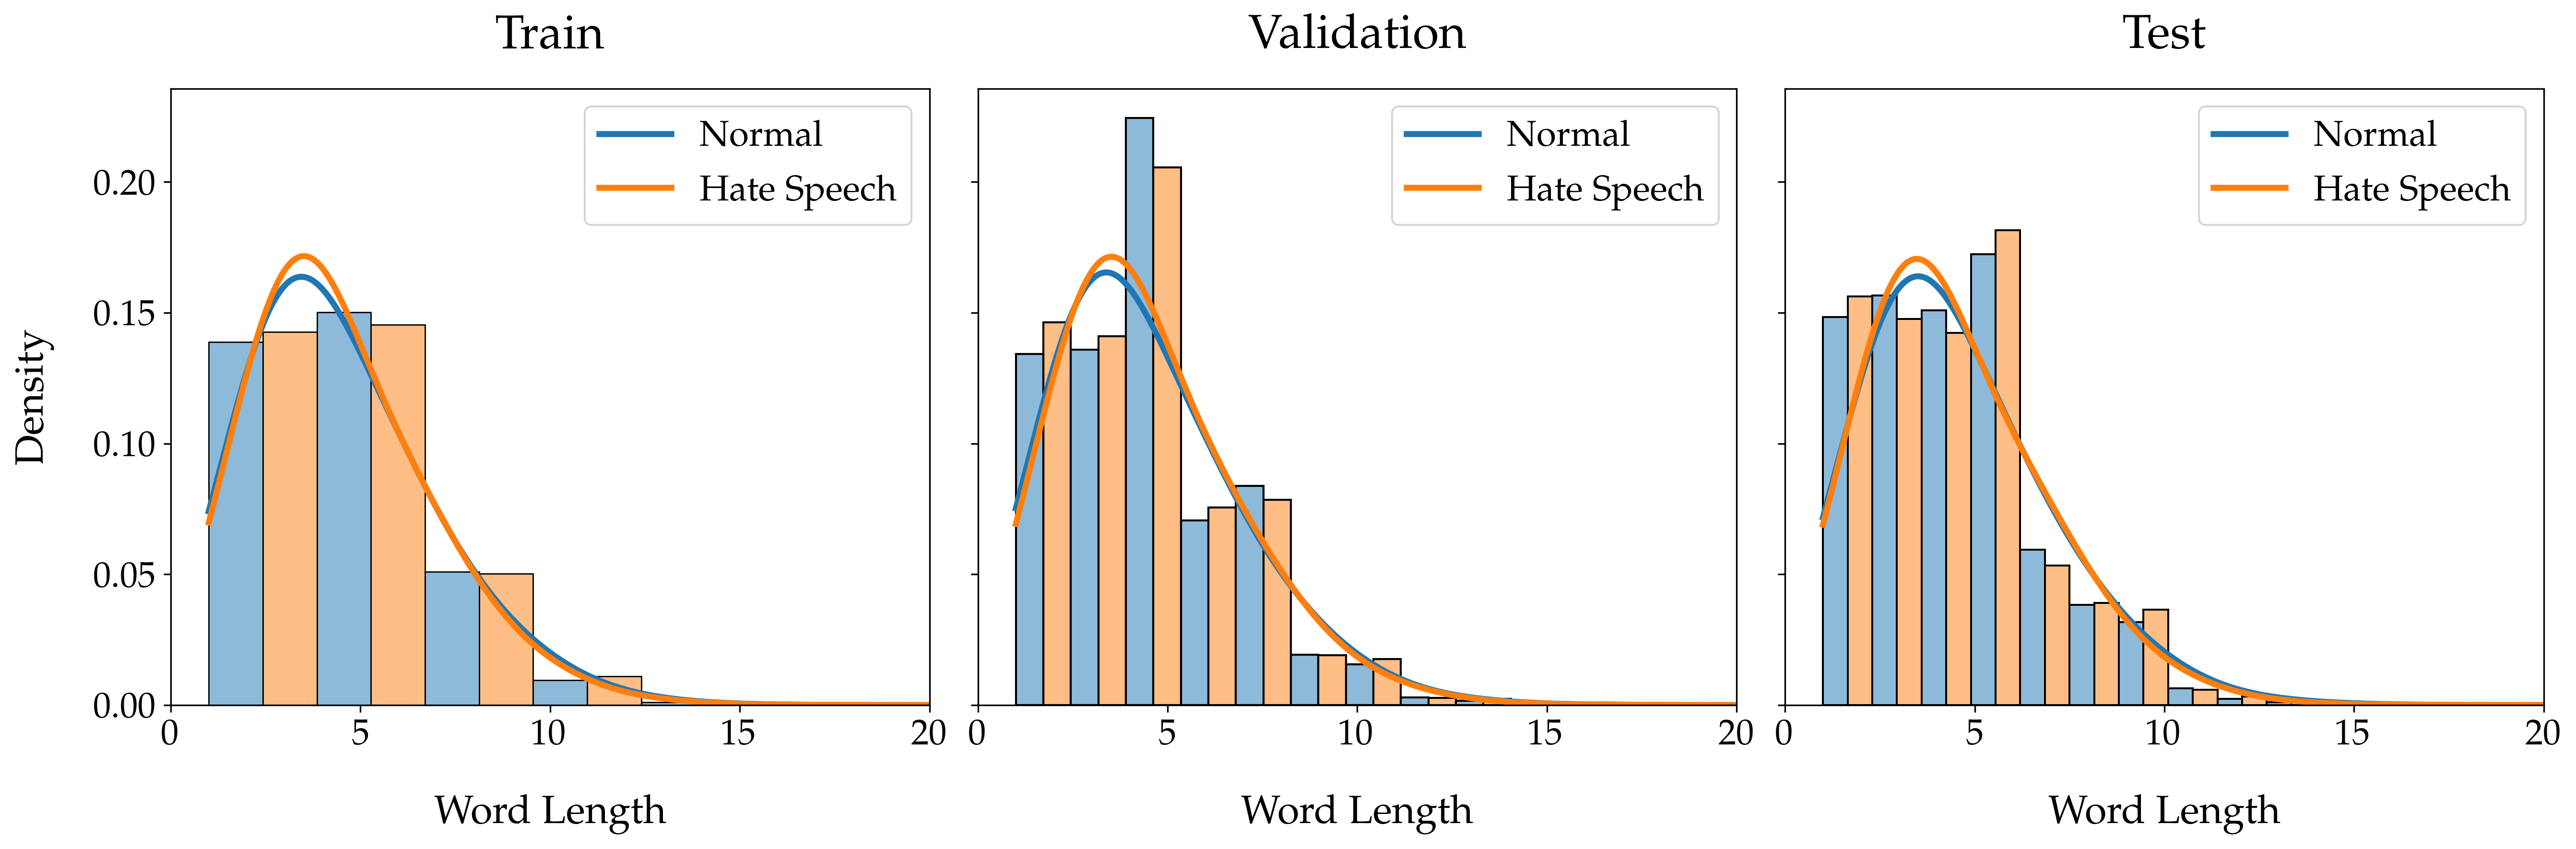

In [10]:
# Word lengths per class per split
train_descript =  train_dataset.to_pandas().copy()
train_descript["word_lengths"] = train_descript["tokens"].apply(lambda x: [len(word) for word in x])

val_descript =  val_dataset.to_pandas().copy()
val_descript["word_lengths"] = val_descript["tokens"].apply(lambda x: [len(word) for word in x])

test_descript =  test_dataset.to_pandas().copy()
test_descript["word_lengths"] = test_descript["tokens"].apply(lambda x: [len(word) for word in x])

train_word_lenghts = train_descript.explode("word_lengths")
val_word_lenghts = val_descript.explode("word_lengths")
test_word_lenghts = test_descript.explode("word_lengths")


fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, dpi=300)

for i, (df_word_lengths, ax) in enumerate(zip([train_word_lenghts, val_word_lenghts, test_word_lenghts], axs)):
    sns.histplot(
        data=df_word_lengths,
        x="word_lengths",
        hue="label",
        bins=20,
        kde=False,
        stat="density",
        ax=ax,
        multiple="dodge",
        common_norm=False,
        alpha=0.5,
    )

    bin_edges = np.histogram_bin_edges(df_word_lengths["word_lengths"], bins=20)
    for label, color in zip(["Normal", "Hate Speech"], sns.color_palette()):
        subset = df_word_lengths[df_word_lengths["label"] == {"Normal": "normal", "Hate Speech": "hatespeech"}[label]]

        kde = gaussian_kde(subset["word_lengths"].to_numpy().astype(int), bw_method=0.5)

        x_vals = np.linspace(subset["word_lengths"].min(), subset["word_lengths"].max(), 500)
        y_kde = kde(x_vals)

        ax.plot(x_vals, y_kde, lw=3, label=f"{label}", color=color)

    ax.legend(fontsize=18)
    ax.set_xlim(0, 20)
    ax.tick_params(axis="both", which="major", labelsize=18)

    ax.set_xlabel("Word Length", fontdict={"size": 20}, labelpad=20)
    ax.set_ylabel("Density", fontdict={"size": 20}, labelpad=20)
    ax.set_title(["Train", "Validation", "Test"][i], fontdict={"size": 24}, pad=20)

plt.tight_layout()
plt.savefig(FIGURES_DIR / "descriptive" / "desc_word_lengths_sp.png", dpi=300, bbox_inches="tight")


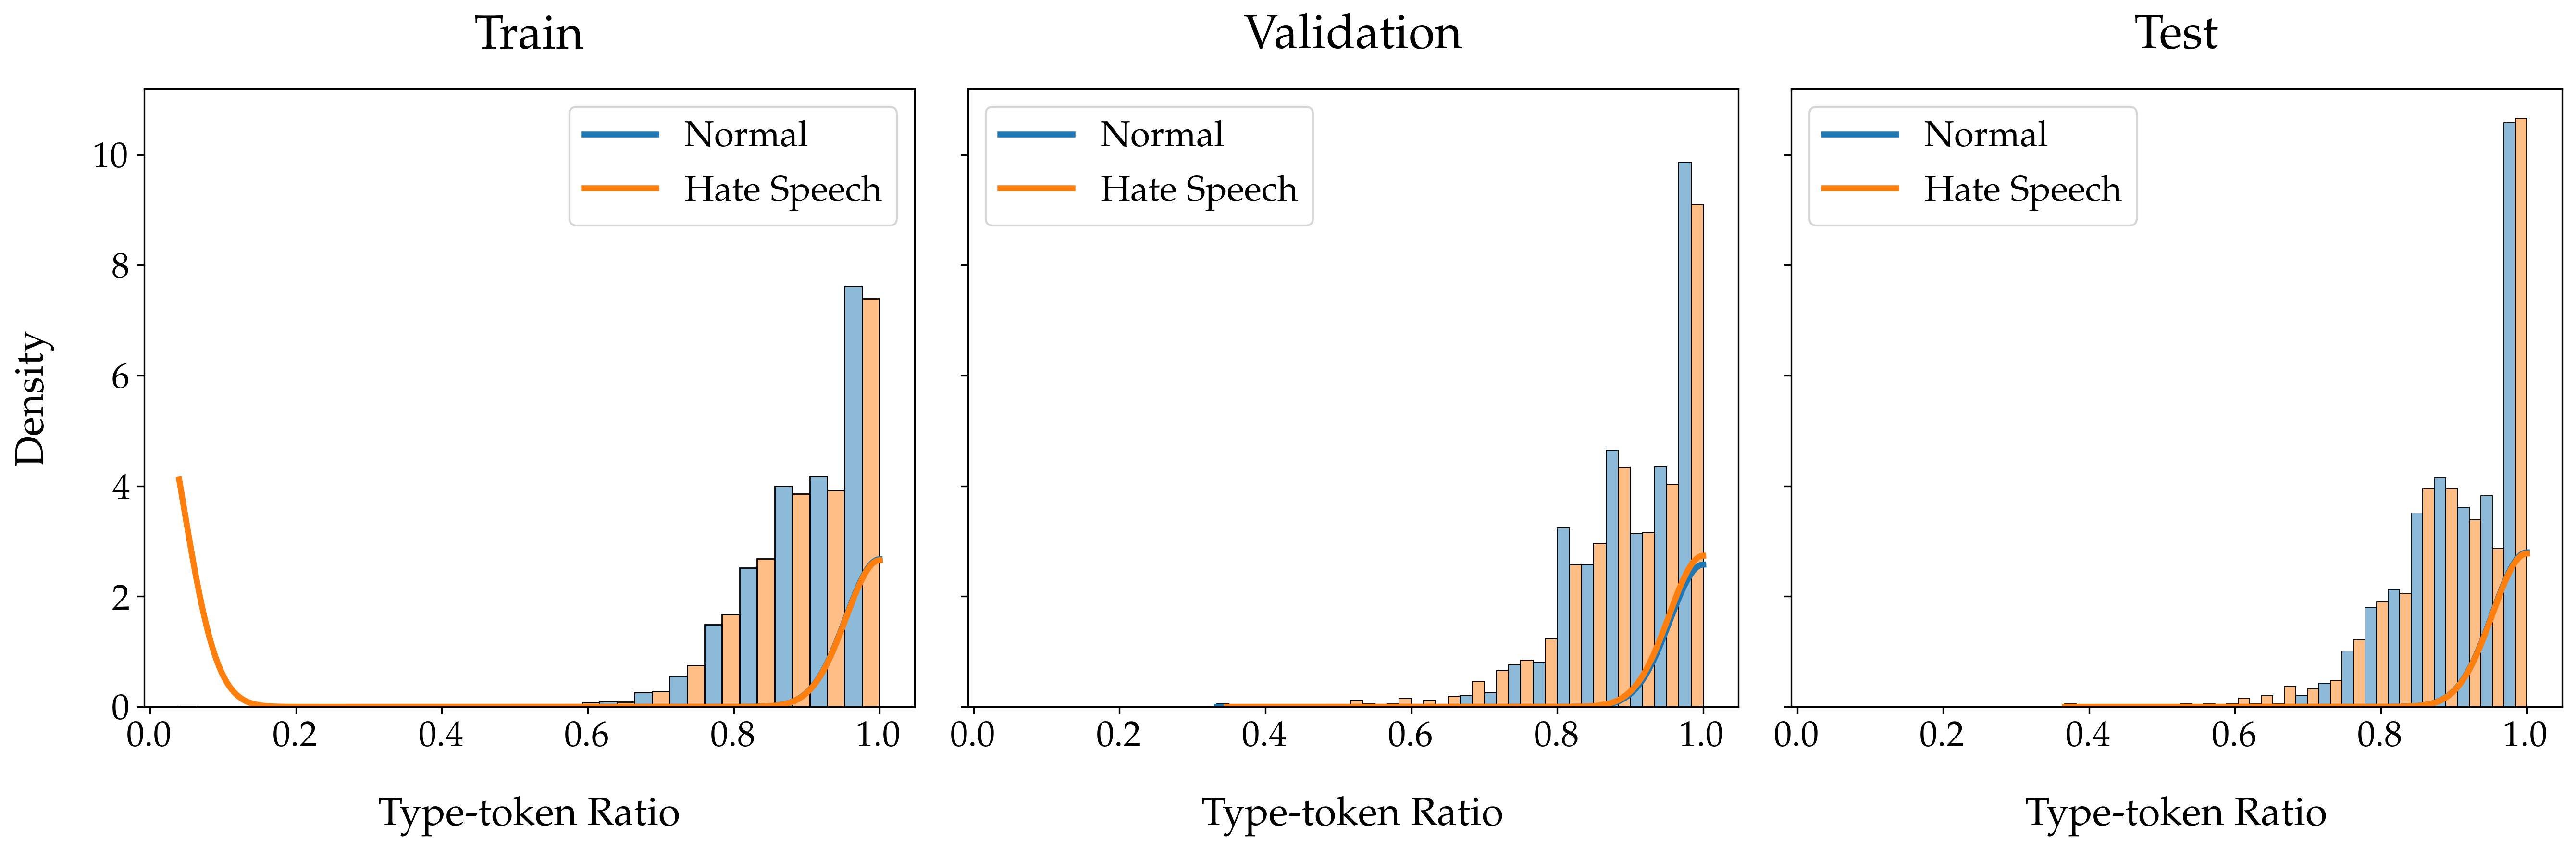

In [11]:
# Type to token ratio per class per split
train_descript =  train_dataset.to_pandas().copy()
train_descript["ttr"] = train_descript["tokens"].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)

val_descript =  val_dataset.to_pandas().copy()
val_descript["ttr"] = val_descript["tokens"].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)

test_descript =  test_dataset.to_pandas().copy()
test_descript["ttr"] = test_descript["tokens"].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)


fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, dpi=300)

for i, (df_word_lengths, ax) in enumerate(zip([train_descript, val_descript, test_descript], axs)):
    sns.histplot(
        data=df_word_lengths,
        x="ttr",
        hue="label",
        bins=20,
        kde=False,
        stat="density",
        ax=ax,
        multiple="dodge",
        common_norm=False,
        alpha=0.5,
    )

    bin_edges = np.histogram_bin_edges(df_word_lengths["ttr"], bins=20)

    for label, color in zip(["Normal", "Hate Speech"], sns.color_palette()):
        subset = df_word_lengths[df_word_lengths["label"] == {"Normal": "normal", "Hate Speech": "hatespeech"}[label]]

        kde = gaussian_kde(subset["ttr"].to_numpy().astype(int), bw_method=0.1)

        x_vals = np.linspace(subset["ttr"].min(), subset["ttr"].max(), 500)
        y_kde = kde(x_vals)

        ax.plot(x_vals, y_kde, lw=3, label=f"{label}", color=color)

    ax.legend(fontsize=18)

    ax.tick_params(axis="both", which="major", labelsize=18)

    ax.set_xlabel("Type-token Ratio", fontdict={"size": 20}, labelpad=20)
    ax.set_ylabel("Density", fontdict={"size": 20}, labelpad=20)
    ax.set_title(["Train", "Validation", "Test"][i], fontdict={"size": 24}, pad=20)

plt.tight_layout()
plt.savefig(FIGURES_DIR / "descriptive" / "desc_ttr_sp.png", dpi=300, bbox_inches="tight")


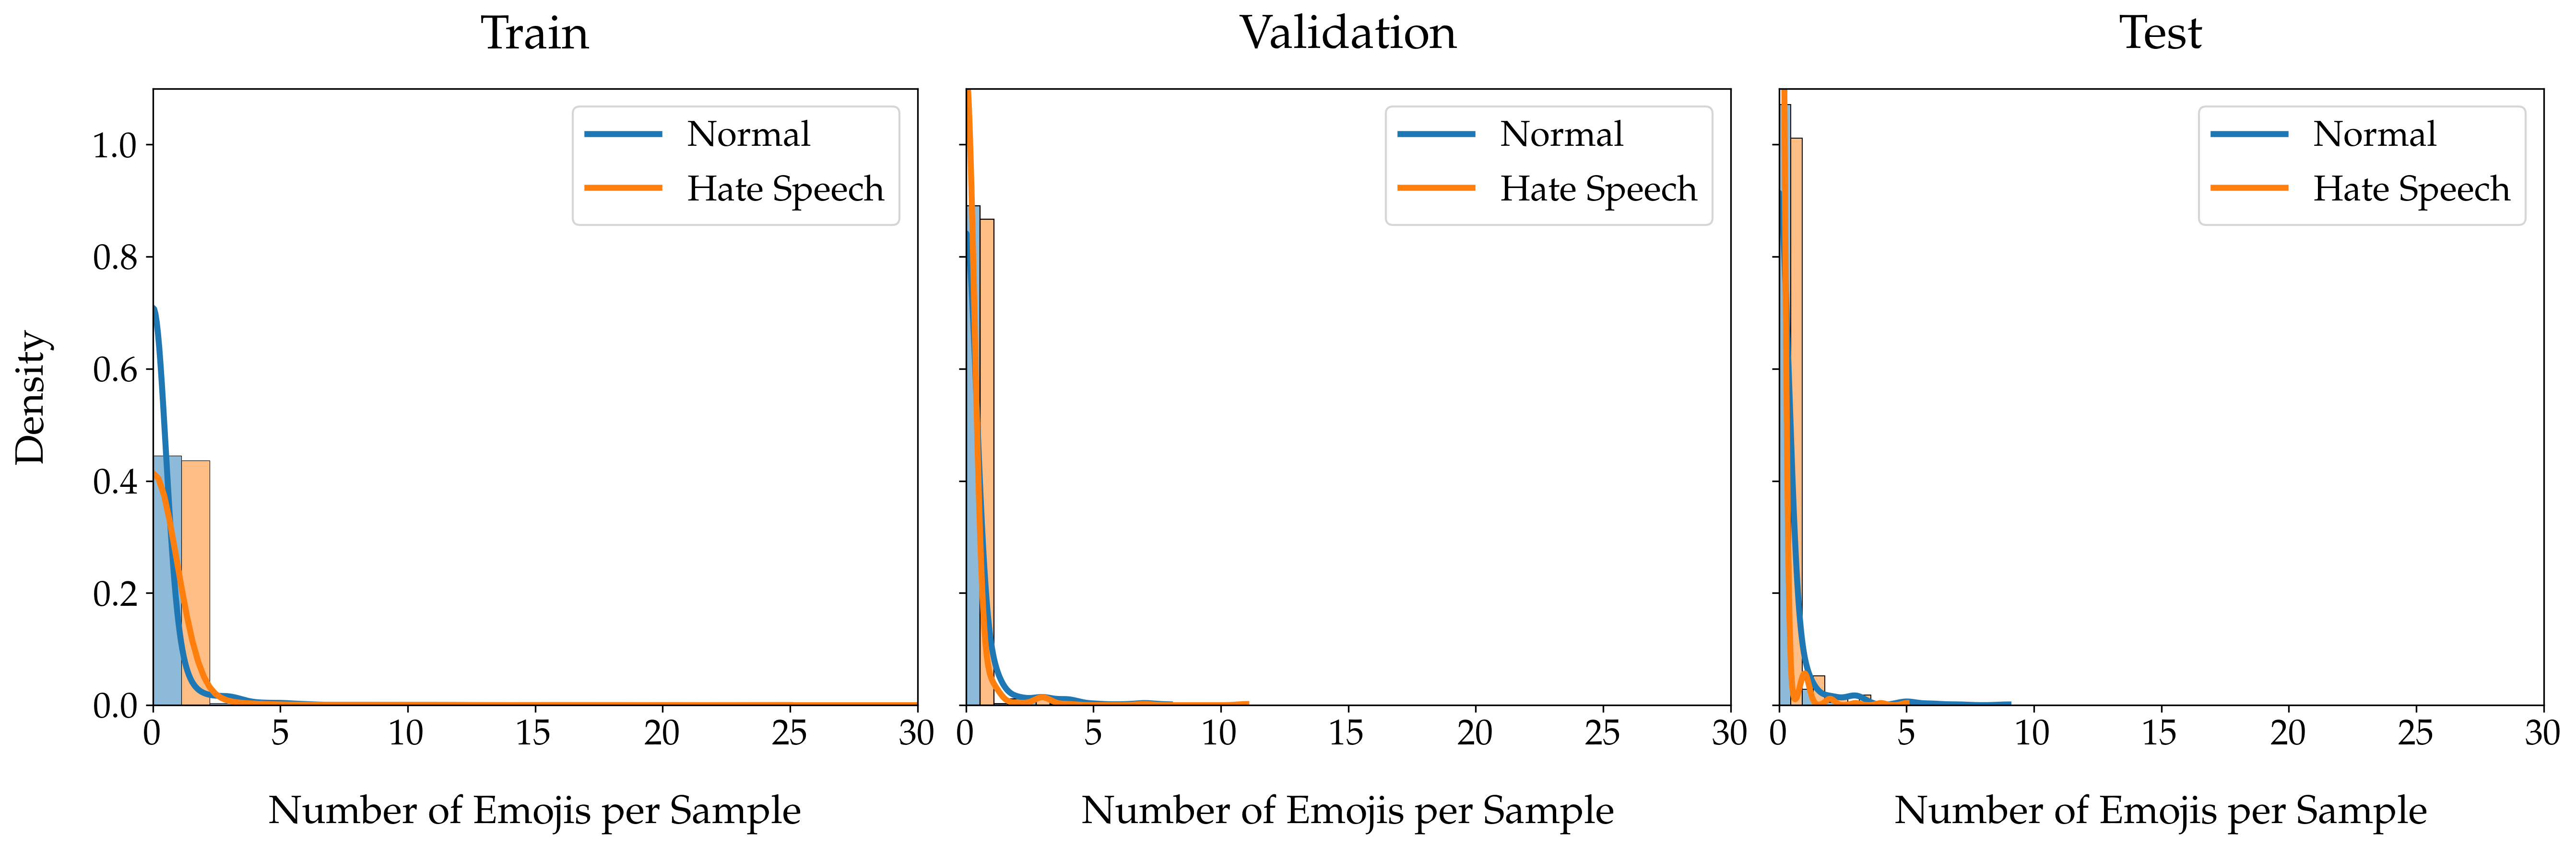

In [12]:
# Number of emojis per sample per split per class
def count_emojis(
    tokens: list[str],
) -> int:
    """Count the number of emojis in a list of tokens using the emoji library.

    Args:
        tokens (list[str]): A list of tokens (words) from a text sample.

    Returns:
        int: The count of emojis in the list of tokens.

    """
    text = " ".join(tokens)
    return len(emoji.emoji_list(text))

train_descript = train_dataset.to_pandas().copy()
train_descript["emoji_count"] = train_descript["tokens"].apply(count_emojis)

val_descript = val_dataset.to_pandas().copy()
val_descript["emoji_count"] = val_descript["tokens"].apply(count_emojis)

test_descript = test_dataset.to_pandas().copy()
test_descript["emoji_count"] = test_descript["tokens"].apply(count_emojis)

# Plotting the distribution of word lengths
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, dpi=300)

for i, (df_word_lengths, ax) in enumerate(zip([train_descript, val_descript, test_descript], axs)):
    sns.histplot(
        data=df_word_lengths,
        x="emoji_count",
        hue="label",
        bins=10 if i > 0 else 50,
        kde=False,
        stat="density",
        ax=ax,
        multiple="dodge",
        common_norm=False,
        alpha=0.5,
    )

    bin_edges = np.histogram_bin_edges(df_word_lengths["emoji_count"], bins=20)
    for label, color in zip(["Normal", "Hate Speech"], sns.color_palette()):
        subset = df_word_lengths[df_word_lengths["label"] == {"Normal": "normal", "Hate Speech": "hatespeech"}[label]]

        kde = gaussian_kde(subset["emoji_count"].to_numpy().astype(int), bw_method=0.5)

        x_vals = np.linspace(subset["emoji_count"].min(), subset["emoji_count"].max(), 500)
        y_kde = kde(x_vals)

        ax.plot(x_vals, y_kde, lw=3, label=f"{label}", color=color)

    ax.legend(fontsize=18)
    ax.set_xlim(0, 30)
    ax.set_ylim(0, 1.1)
    ax.tick_params(axis="both", which="major", labelsize=18)

    ax.set_xlabel("Number of Emojis per Sample", fontdict={"size": 20}, labelpad=20)
    ax.set_ylabel("Density", fontdict={"size": 20}, labelpad=20)
    ax.set_title(["Train", "Validation", "Test"][i], fontdict={"size": 24}, pad=20)

plt.tight_layout()
plt.savefig(FIGURES_DIR / "descriptive" / "desc_n_emojis_sp.png", dpi=300, bbox_inches="tight")


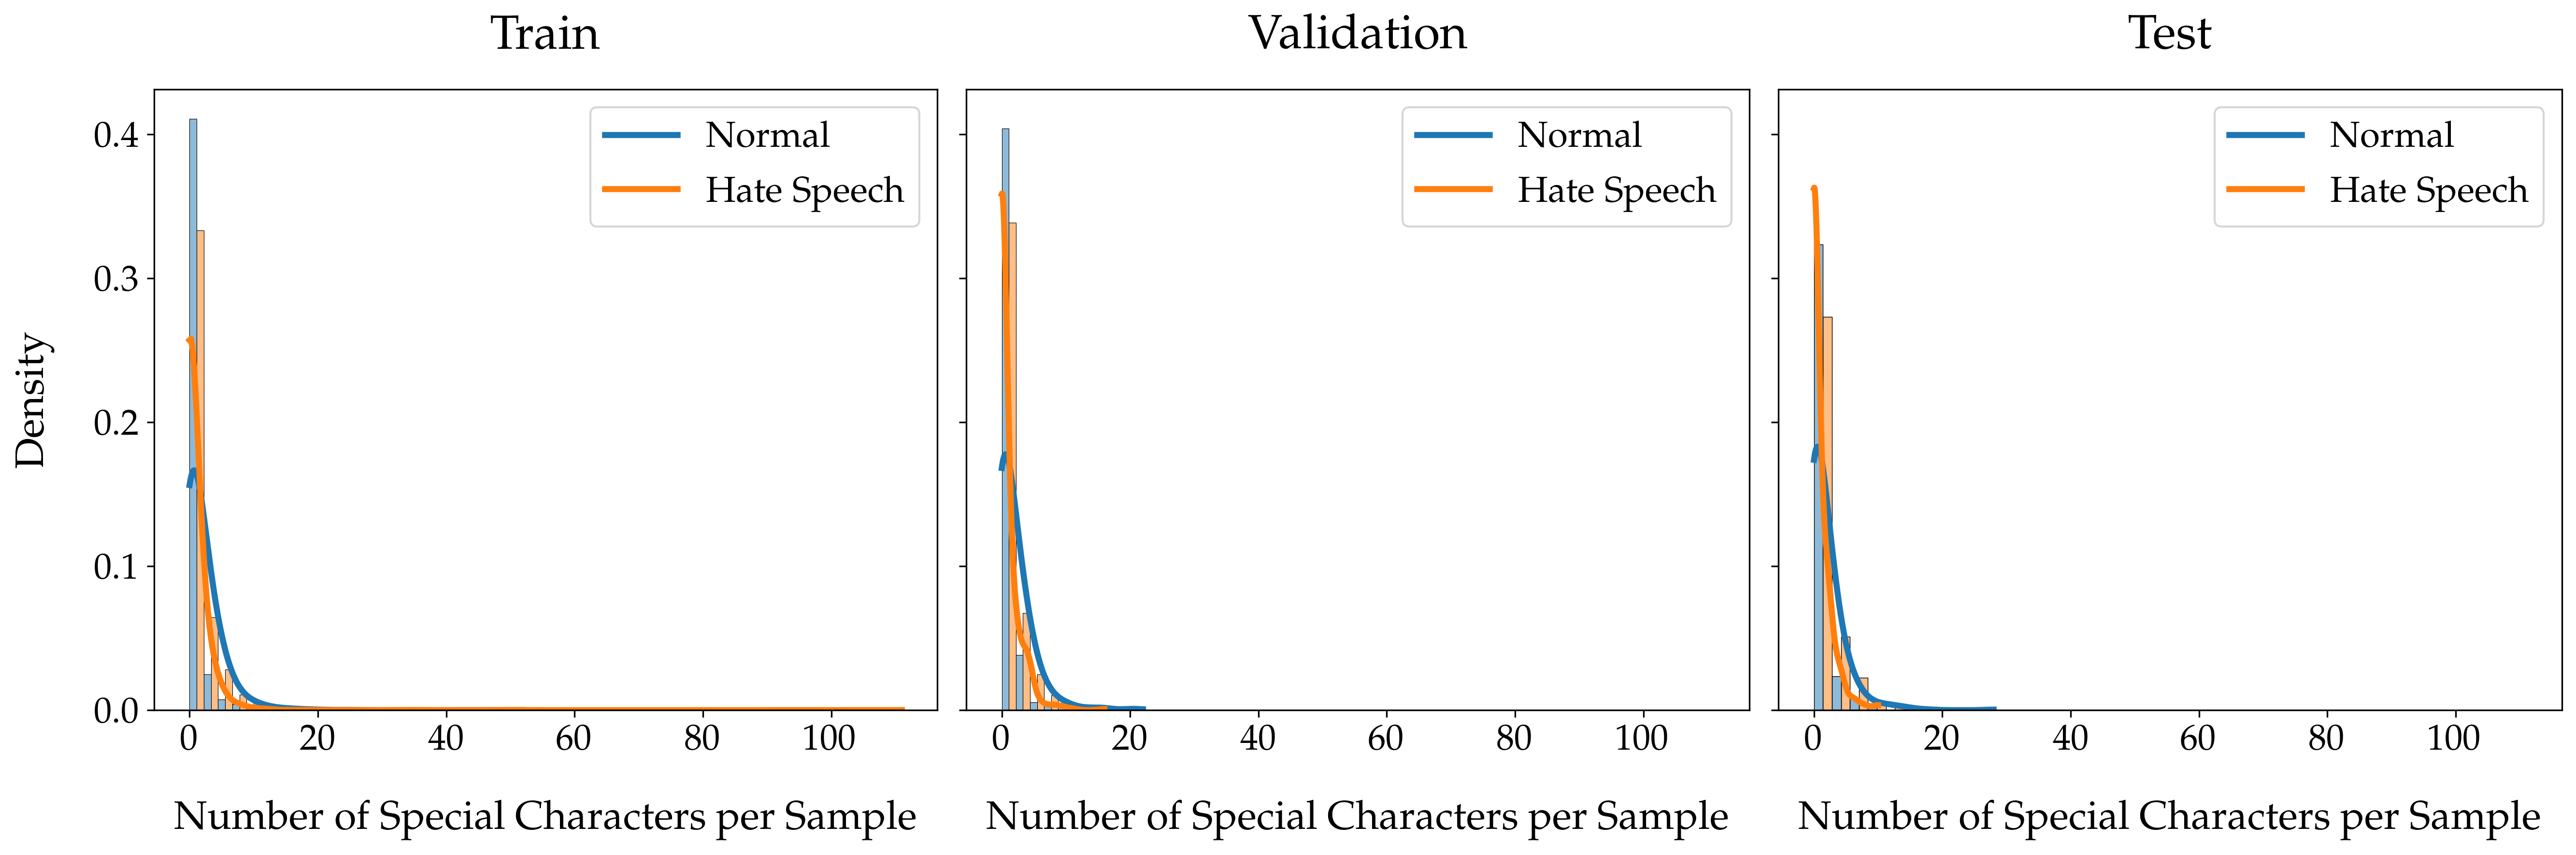

In [13]:
# Number of special characters per sample per split per class
def count_special_characters(
    tokens: list[str],
) -> int:
    """Count the number of special characters in a list of tokens.

    Args:
        tokens (list[str]): A list of tokens (words) from a text sample.

    Returns:
        int: The count of special characters in the list of tokens.

    """
    text = " ".join(tokens)

    return len([x for x in text if not x.isalnum() and not x.isspace()])

train_descript = train_dataset.to_pandas().copy()
train_descript["spchar_count"] = train_descript["tokens"].apply(count_special_characters)

val_descript = val_dataset.to_pandas().copy()
val_descript["spchar_count"] = val_descript["tokens"].apply(count_special_characters)

test_descript = test_dataset.to_pandas().copy()
test_descript["spchar_count"] = test_descript["tokens"].apply(count_special_characters)


fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, dpi=300)

for i, (df_word_lengths, ax) in enumerate(zip([train_descript, val_descript, test_descript], axs)):
    sns.histplot(
        data=df_word_lengths,
        x="spchar_count",
        hue="label",
        bins=10 if i > 0 else 50,
        kde=False,
        stat="density",
        ax=ax,
        multiple="dodge",
        common_norm=False,
        alpha=0.5,
    )


    bin_edges = np.histogram_bin_edges(df_word_lengths["spchar_count"], bins=20)
    for label, color in zip(["Normal", "Hate Speech"], sns.color_palette()):
        subset = df_word_lengths[df_word_lengths["label"] == {"Normal": "normal", "Hate Speech": "hatespeech"}[label]]


        kde = gaussian_kde(subset["spchar_count"].to_numpy().astype(int), bw_method=0.5)


        x_vals = np.linspace(subset["spchar_count"].min(), subset["spchar_count"].max(), 500)
        y_kde = kde(x_vals)

        ax.plot(x_vals, y_kde, lw=3, label=f"{label}", color=color)

    ax.legend(fontsize=18)

    ax.tick_params(axis="both", which="major", labelsize=18)

    ax.set_xlabel("Number of Special Characters per Sample", fontdict={"size": 20}, labelpad=20)
    ax.set_ylabel("Density", fontdict={"size": 20}, labelpad=20)
    ax.set_title(["Train", "Validation", "Test"][i], fontdict={"size": 24}, pad=20)

plt.tight_layout()
plt.savefig(FIGURES_DIR / "descriptive" / "desc_spchar_count_sp.png", dpi=300, bbox_inches="tight")
